# Neural Networks

# <font color='red'>Part I: Theory</font>

#### <font color='red'>Write out the cost function and gradient descent for each layer of a neural network that has 3 inputs in the first layer, 2 inputs in the second hidden layer, and one output.</font>

#### <font color='blue'> 1. Definition </font>

- Define the sigmoid function $\sigma(x) = \dfrac{1}{1+e^{-x}} \equiv y$ and hence $\sigma'(x) = \sigma(x)(1-\sigma(x)) = y(1-y).$ 

- Define $z_i^{l}$ as the input of unit $i$ in layer $l$ and $a_i^{l} = \sigma(z_i^{l})$ as its corrsponding "activiation".

    $\Rightarrow$ $1^{st}$ layer: $\exists$ 4 elements: $a_0^{(1)} = \sigma(z_0^{(1)}), a_1^{(1)} = \sigma(z_1^{(1)}), a_2^{(1)} = \sigma(z_2^{(1)}), a_3^{(1)} = \sigma(z_3^{(1)})$, where $a_0^{(1)}$ is the constant and $a_i^{(1)}$ are input nodes.
    
    $\Rightarrow$ $2^{nd}$ layer: $\exists$ 3 elements: $a_0^{(2)} = \sigma(z_0^{(2)}), a_1^{(2)} = \sigma(z_1^{(2)}), a_2^{(2)} = \sigma(z_2^{(2)}),$ where $a_0^{(2)}$ is the constant. 
    
    $\Rightarrow$ $3^{rd}$ layer: $\exists$ one element: $a_1^{(3)} = h_{\Theta} (\boldsymbol{x}) = \sigma(z^3)$ which is the output of the NN.

- Define $\Theta_{ij}^{(l)}$ as the weighting function that transforms unit $j$ in layer $l$ to unit $i$ in layer $l+1$.

- Define $\delta_j^{(l)} = \dfrac{\partial J(\Theta)}{\partial z_j^{l}}$ as the "error" of unit $j$ in layer $l$, where $J(\Theta)$ is defined in part 2. 

#### <font color='blue'> 2. Cost function </font>

The cost function with regularization for a neural network can be express as:

$J(\Theta) = -\dfrac{1}{n} \{\sum^N_{i=1} [y_{i} log(h_{\Theta} (\boldsymbol{x}_i)) + (1-y_{i}) log(1-(h_\Theta(\boldsymbol{x}_i))]\} + \dfrac{\lambda}{2n} \sum^{L-1}_{l=1}\sum^{s_l-1}_{i=1}\sum^{s_l}_{j=1}(\Theta^{(l)}_{ji})^2$

We solve via $min_{\Theta} J(\Theta)$ and we have $\dfrac{\partial J(\Theta)}{\partial \Theta_{ij}^l} = a_j^l\delta_i^{l+1}$, where $a_j^{l}$ is acquired from forward propagation and $\delta_i^{l+1}$ is computed from backpropagation. 

#### <font color='blue'> 3. Gradient of each layer </font>

Given one labeled training instance $(\boldsymbol{x}, y), J^*(\Theta) = -ylog(h_\Theta(\boldsymbol{x})) - (1-y)(1-log(h_\Theta(\boldsymbol{x}))$ 

To apply chain rule, let's start backwards: 

For the $3^{rd}$ layer, $\delta^{(3)} = \dfrac{\partial J^*(\Theta)}{\partial z_1^{(3)}} = a_1^{(3)} - y$

For the $2^{nd}$ layer, $\dfrac{\partial J^*(\Theta)}{\partial \Theta_{1j}^{(2)}} = a_i^{(2)}\delta_j^{(3)} = a_j^{(2)}(a_1^{(3)} - y)$, and $\delta^{(2)} = \dfrac{\partial J^*(\Theta)}{\partial z_i^{(2)}} = \dfrac{\partial J^*(\Theta)}{\partial z_1^{(3)}} \times \dfrac{\partial z_1^{(3)}}{\partial a_i^{(2)}} \times \dfrac{\partial a_i^{(2)}}{\partial z_i^{(2)}} = (a_1^{(3)} - y) \times \Theta_{1i}^{(2)} \times a_i^{(2)}(1-a_i^{(2)}).$

For the $1^{st}$ layer, $\dfrac{\partial J^*(\Theta)}{\partial \Theta_{ij}^{(1)}} = a_j^{(1)} \delta_i^{(2)} = a_j^{(1)} \times (a_1^{(3)} - y) \times \Theta_{1i}^{(2)} \times a_i^{(2)}(1-a_i^{(2)}).$

#### <font color='blue'> 4. Gradient descent method </font>

Based on part 3, let's apply the gradient descent, which is $\Theta_{ij}^{(l)} := \Theta_{ij}^{(l)} - \alpha\dfrac{\partial J(\Theta)}{\partial \Theta_{ij}^l} = \Theta_{ij}^{(l)} - \alpha\delta_j^{(l+1)},$ 

where $\alpha$ is the learning rate and it can be inferred from $\dfrac{\partial J^*(\Theta)}{\partial \Theta_{1j}^{(2)}}$ and $\dfrac{\partial J^*(\Theta)}{\partial \Theta_{ij}^{(1)}}$ that:

- $\dfrac{\partial J(\Theta)}{\partial \Theta_{1j}^{(2)}} = \dfrac{1}{N} \sum^N_{i=1} [a_j^{(2)}(a_1^{(3)} - y)] + \dfrac{\lambda}{n} \Theta_{1j}^{(2)}$;




- $\dfrac{\partial J(\Theta)}{\partial \Theta_{ij}^{(1)}} = \dfrac{1}{N} \sum^N_{i=1} [a_j^{(1)} \times (a_1^{(3)} - y) \times \Theta_{1i}^{(2)} \times a_i^{(2)}(1-a_i^{(2)})] + \dfrac{\lambda}{n} \Theta_{ij}^{(1)}$.

# <font color='red'>Part II: Simulation</font>

###  <font color='blue'>2.a) Simulate the data </font>

In [1]:
# libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X_train, Y_train = make_classification(n_samples = 500,     # 500 observations
                                       n_features = 3,      # 3 features
                                       n_informative = 2,   # 2 informative
                                       n_redundant = 1,     # 1 redundant
                                       n_classes = 2,       # 2 classes output
                                       weights=[0.3,0.7])   # 0.3 and 0.7
X_test, Y_test = make_classification(n_samples = 100,        # 100 observations
                                       n_features = 3,      # 3 features
                                       n_informative = 2,   # 2 informative
                                       n_redundant = 1,     # 1 redundant
                                       n_classes = 2,       # 2 classes output
                                       weights=[0.3,0.7])   # 0.3 and 0.7

###  <font color='blue'>2.b) A single hidden layer NN via backpropagation and weight decay </font>

####  Define a series of functions

In [3]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [4]:
import warnings
warnings.filterwarnings('ignore')

def initialize_parameters(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l-1], layer_dims[l]) * 0.01#np.sqrt(2 / layer_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l-1], layer_dims[l]))
        assert(parameters['b' + str(l)].shape == layer_dims[l], 1)
        
    return parameters

<>:14: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:14: SyntaxWarning: assertion is always true, perhaps remove parentheses?


In [5]:
def compute_cost(A3, Y):
    m = len(Y)
    Y_hat = A3.transpose()
    this_loss = -(np.log(Y_hat) * Y + (1 - Y)*np.log(1 - Y_hat))
    cost = 1/m * np.sum(this_loss)
    #
    return cost

def compute_cost_with_regularization(A3, Y, parameters, lambd):
    m = Y.shape[0]
    Y_hat = A3.transpose()
    W1 = parameters['W1']
    W2 = parameters['W2']
    cross_entroy_cost = compute_cost(A3,Y)

    L2_regularization_cost = lambd * (np.linalg.norm(W1) + np.linalg.norm(W2)) / (2 * m)
    
    cost = cross_entroy_cost + L2_regularization_cost
    return cost

In [6]:
def forward_propagation(X, parameters):
        
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = X @ W1  + b1.transpose()
    A1 = Z1

    Z2 = A1 @ W2 + b2.transpose()
    A2 = sigmoid(Z2) # we do need sigmoid to make these positive

    return A1, A2, Z1, Z2

In [7]:
def predict(X, y, parameters):

    A1, A2, Z1, Z2 = forward_propagation(X, parameters)
    pred = pd.DataFrame(A2, columns = ["y"])
    pred['y_map'] = pd.Series(np.zeros(pred.shape[0]))
    pred.loc[pred['y']>0.5, 'y_map'] = 1
    print('Accuracy =', np.mean(pred["y_map"] == y[0:]))
    p = pred["y_map"]
    
    return p

In [8]:
def update_parameters(parameters, grads, learning_rate):

    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]
    
    W1_new = W1 - (learning_rate * dW1).transpose()
    W2_new = W2 - (learning_rate * dW2).transpose()
    b1_new = b1 - learning_rate * db1
    b2_new = b2 - learning_rate * db2
    
    parameters_new = {}
    parameters_new["W1"] = W1_new
    parameters_new["W2"] = W2_new
    parameters_new["b1"] = b1_new
    parameters_new["b2"] = b2_new
    
    return parameters_new

In [9]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
    
    m = X.shape[1]
    (Z1,A1,W1,b1,Z2,A2,W2,b2) = cache
    
    Y_hat = A2.transpose()
    dZ2 = Y_hat - Y

    sigma_prime = lambda Z: sigmoid(Z)*(1-sigmoid(Z))
    nochange_prime = lambda Z, X: np.tile(1, (X.shape[0], A1.shape[1]))

    dW2 = (1/m)*dZ2 * sigma_prime(Z2.transpose()) @ A1 + (lambd*np.mean(W2))
    db2 = (1/m)*np.sum(dZ2 * sigma_prime(Z2.transpose()), axis=1, keepdims=True)

    dW1 = (1/m)*((dZ2 * sigma_prime(Z2.transpose())).T @ W2.T * nochange_prime(Z1, X)).T @ X + (lambd*np.mean(W1))
    db1 = (1/m)*np.sum(((dZ2 * sigma_prime(Z2.transpose())).T @ W2.T * nochange_prime(Z1, X)).T, axis=1, keepdims=True)
    
    grads = {}
    grads["dW1"] = dW1
    grads["dW2"] = dW2
    grads["db1"] = db1
    grads["db2"] = db2

    return grads

In [10]:
def backward_propagation(X, Y, cache):
    m = X.shape[1]
    (Z1,A1,W1,b1,Z2,A2,W2,b2) = cache
    
    Y_hat = A2.transpose()
    dZ2 = Y_hat - Y

    sigma_prime = lambda Z: sigmoid(Z)*(1-sigmoid(Z))
    nochange_prime = lambda Z, X: np.tile(1, (X.shape[0], A1.shape[1]))

    dW2 = (1/m)*dZ2 * sigma_prime(Z2.transpose()) @ A1 
    db2 = (1/m)*np.sum(dZ2 * sigma_prime(Z2.transpose()), axis=1, keepdims=True)

    dW1 = (1/m)*((dZ2 * sigma_prime(Z2.transpose())).T @ W2.T * nochange_prime(Z1, X)).T @ X 
    db1 = (1/m)*np.sum(((dZ2 * sigma_prime(Z2.transpose())).T @ W2.T * nochange_prime(Z1, X)).T, axis=1, keepdims=True)
    
    grads = {}
    grads["dW1"] = dW1
    grads["dW2"] = dW2
    grads["db1"] = db1
    grads["db2"] = db2

    return grads

####  Put the functions together into one model

In [11]:
def model(X, Y, learning_rate, num_iterations, print_cost, lambd, h):        
    grads = {}
    costs = []                           
    m = X.shape[1]                       
    layers_dims = [X.shape[1], h, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Gradient descent
    for i in range(0, num_iterations):

        # Forward propagation
        A1, A2, Z1, Z2 = forward_propagation(X, parameters)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(A2, Y)
        else:
            cost = compute_cost_with_regularization(A2, Y, parameters, lambd)
            
        # Backward propagation.
        W1 = parameters["W1"]
        W2 = parameters["W2"]
        b1 = parameters["b1"]
        b2 = parameters["b2"]
        cache = (Z1,A1,W1,b1,Z2,A2,W2,b2)
        keep_prob = 1
        assert(lambd == 0 or keep_prob == 1)   
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)                  
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate)+", Lambda =" +str(lambd))
    plt.show()
    
    return parameters

###  <font color='blue'>2.c) Apply to the simulated data </font>

Cost after iteration 0: 0.6929862779684034
Cost after iteration 1000: 0.19744082565861792
Cost after iteration 2000: 0.19744082565861792
Cost after iteration 3000: 0.19744082565861792
Cost after iteration 4000: 0.19744082565861792
Cost after iteration 5000: 0.19744082565861792
Cost after iteration 6000: 0.19744082565861792
Cost after iteration 7000: 0.19744082565861792
Cost after iteration 8000: 0.19744082565861792
Cost after iteration 9000: 0.19744082565861792


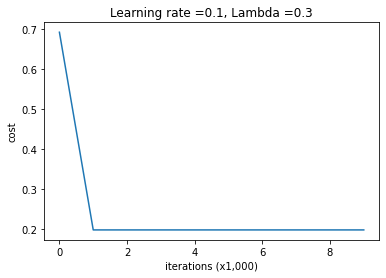

Accuracy = 0.924
Accuracy = 0.88


In [12]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
parameters = model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 0.3, h = 10)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

###  <font color='blue'>2.d) Training accuracy for different values of weight decay parameter ($\lambda$, the regularization term)</font>

####  Lambda = 0.0001

Cost after iteration 0: 0.6929591658990044
Cost after iteration 1000: 0.1962871590730892
Cost after iteration 2000: 0.1962871590730892
Cost after iteration 3000: 0.1962871590730892
Cost after iteration 4000: 0.1962871590730892
Cost after iteration 5000: 0.1962871590730892
Cost after iteration 6000: 0.1962871590730892
Cost after iteration 7000: 0.1962871590730892
Cost after iteration 8000: 0.1962871590730892
Cost after iteration 9000: 0.1962871590730892


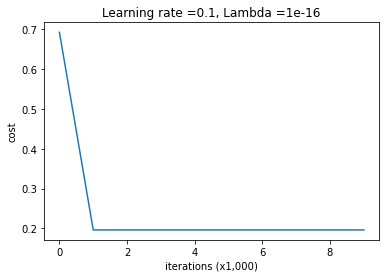

Accuracy = 0.924
Accuracy = 0.88


In [13]:
parameters = model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 0.0001, h = 10)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

####  Lambda = 0

Cost after iteration 0: 0.6929591658990044
Cost after iteration 1000: 0.1962871590730892
Cost after iteration 2000: 0.1962871590730892
Cost after iteration 3000: 0.1962871590730892
Cost after iteration 4000: 0.1962871590730892
Cost after iteration 5000: 0.1962871590730892
Cost after iteration 6000: 0.1962871590730892
Cost after iteration 7000: 0.1962871590730892
Cost after iteration 8000: 0.1962871590730892
Cost after iteration 9000: 0.1962871590730892


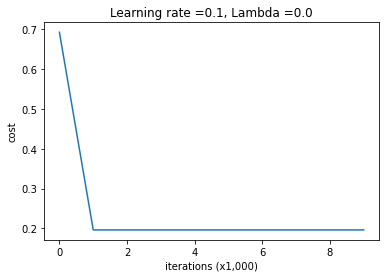

Accuracy = 0.924
Accuracy = 0.88


In [14]:
parameters = model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 0.0, h = 10)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

####  Lambda = 2

Cost after iteration 0: 0.6931399130283309
Cost after iteration 1000: 0.2039636844025116
Cost after iteration 2000: 0.2039636844025116
Cost after iteration 3000: 0.2039636844025116
Cost after iteration 4000: 0.2039636844025116
Cost after iteration 5000: 0.2039636844025116
Cost after iteration 6000: 0.2039636844025116
Cost after iteration 7000: 0.2039636844025116
Cost after iteration 8000: 0.2039636844025116
Cost after iteration 9000: 0.2039636844025116


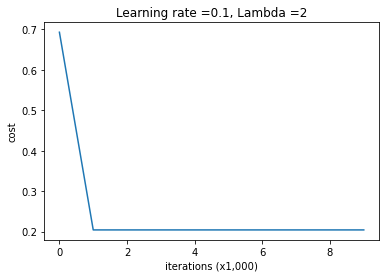

Accuracy = 0.924
Accuracy = 0.88


In [15]:
model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 2, h = 10)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

As shown above, we have a minor overfitting problem for all $\lambda$s, with the accuracy of the test set (=0.88) being slightly lower than that of the training set (=0.924). 

###  <font color='blue'>2.e) Vary the number of hidden layers from 1 to 10</font>

####  Layer = 1

Cost after iteration 0: 0.6931959126636198
Cost after iteration 1000: 0.1979040579353267
Cost after iteration 2000: 0.1984490175424456
Cost after iteration 3000: 0.19884901895009943
Cost after iteration 4000: 0.19915695186523427
Cost after iteration 5000: 0.19940738199615066
Cost after iteration 6000: 0.19961907005747206
Cost after iteration 7000: 0.1998029702870005
Cost after iteration 8000: 0.20037390161446358
Cost after iteration 9000: 0.20028050571129283


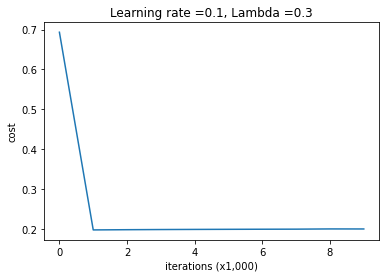

Accuracy = 0.922
Accuracy = 0.72


In [16]:
parameters = model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 0.3, h = 1)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

####  Layer = 2

Cost after iteration 0: 0.693106135951093
Cost after iteration 1000: 0.19754071380875943
Cost after iteration 2000: 0.1975407138089247
Cost after iteration 3000: 0.1975407138089247
Cost after iteration 4000: 0.1975407138089247
Cost after iteration 5000: 0.1975407138089247
Cost after iteration 6000: 0.1975407138089247
Cost after iteration 7000: 0.1975407138089247
Cost after iteration 8000: 0.1975407138089247
Cost after iteration 9000: 0.1975407138089247


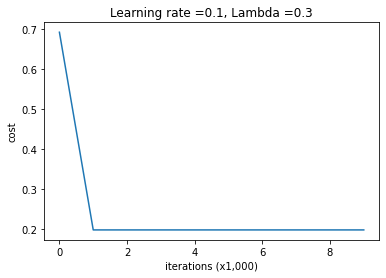

Accuracy = 0.924
Accuracy = 0.88


In [17]:
parameters = model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 0.3, h = 2)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

####  Layer = 3

Cost after iteration 0: 0.6931337380096821
Cost after iteration 1000: 0.1975336038441954
Cost after iteration 2000: 0.1975336038443027
Cost after iteration 3000: 0.1975336038443027
Cost after iteration 4000: 0.1975336038443027
Cost after iteration 5000: 0.1975336038443027
Cost after iteration 6000: 0.1975336038443027
Cost after iteration 7000: 0.1975336038443027
Cost after iteration 8000: 0.1975336038443027
Cost after iteration 9000: 0.1975336038443027


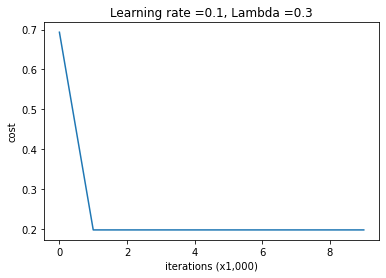

Accuracy = 0.924
Accuracy = 0.88


In [18]:
parameters = model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 0.3, h = 3)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

####  Layer = 4

Cost after iteration 0: 0.6931615558765535
Cost after iteration 1000: 0.1974561854298122
Cost after iteration 2000: 0.19745618542981225
Cost after iteration 3000: 0.19745618542981225
Cost after iteration 4000: 0.19745618542981225
Cost after iteration 5000: 0.19745618542981225
Cost after iteration 6000: 0.19745618542981225
Cost after iteration 7000: 0.19745618542981225
Cost after iteration 8000: 0.19745618542981225
Cost after iteration 9000: 0.19745618542981225


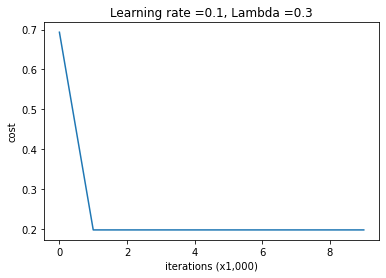

Accuracy = 0.924
Accuracy = 0.88


In [19]:
parameters = model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 0.3, h = 4)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

####  Layer = 5

Cost after iteration 0: 0.6930934610086948
Cost after iteration 1000: 0.19756577386721044
Cost after iteration 2000: 0.19756577386782415
Cost after iteration 3000: 0.19756577386782415
Cost after iteration 4000: 0.19756577386782415
Cost after iteration 5000: 0.19756577386782415
Cost after iteration 6000: 0.19756577386782415
Cost after iteration 7000: 0.19756577386782415
Cost after iteration 8000: 0.19756577386782415
Cost after iteration 9000: 0.19756577386782415


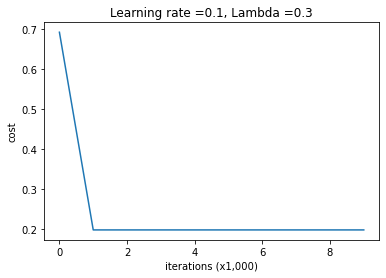

Accuracy = 0.924
Accuracy = 0.88


In [20]:
parameters = model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 0.3, h = 5)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

####  Layer = 6

Cost after iteration 0: 0.6931654506630607
Cost after iteration 1000: 0.19744118842544922
Cost after iteration 2000: 0.19744118842544922
Cost after iteration 3000: 0.19744118842544922
Cost after iteration 4000: 0.19744118842544922
Cost after iteration 5000: 0.19744118842544922
Cost after iteration 6000: 0.19744118842544922
Cost after iteration 7000: 0.19744118842544922
Cost after iteration 8000: 0.19744118842544922
Cost after iteration 9000: 0.19744118842544922


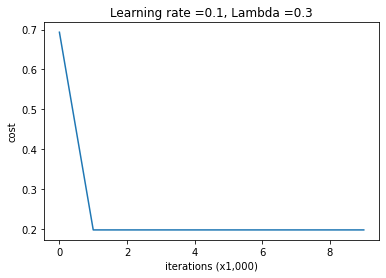

Accuracy = 0.924
Accuracy = 0.88


In [21]:
parameters = model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 0.3, h = 6)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

####  Layer = 7

Cost after iteration 0: 0.6931116605219451
Cost after iteration 1000: 0.19745317692522377
Cost after iteration 2000: 0.19745317692522382
Cost after iteration 3000: 0.19745317692522382
Cost after iteration 4000: 0.19745317692522382
Cost after iteration 5000: 0.19745317692522382
Cost after iteration 6000: 0.19745317692522382
Cost after iteration 7000: 0.19745317692522382
Cost after iteration 8000: 0.19745317692522382
Cost after iteration 9000: 0.19745317692522382


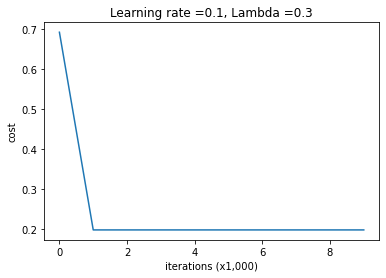

Accuracy = 0.924
Accuracy = 0.88


In [22]:
parameters = model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 0.3, h = 7)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

####  Layer = 8

Cost after iteration 0: 0.6934009336532168
Cost after iteration 1000: 0.19745556675492226
Cost after iteration 2000: 0.19745556675492237
Cost after iteration 3000: 0.19745556675492237
Cost after iteration 4000: 0.19745556675492237
Cost after iteration 5000: 0.19745556675492237
Cost after iteration 6000: 0.19745556675492237
Cost after iteration 7000: 0.19745556675492237
Cost after iteration 8000: 0.19745556675492237
Cost after iteration 9000: 0.19745556675492237


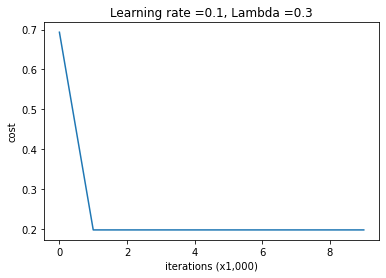

Accuracy = 0.924
Accuracy = 0.88


In [23]:
parameters = model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 0.3, h = 8)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

####  Layer = 9

Cost after iteration 0: 0.6927912251291621
Cost after iteration 1000: 0.19744517545312373
Cost after iteration 2000: 0.19744517545312376
Cost after iteration 3000: 0.19744517545312376
Cost after iteration 4000: 0.19744517545312376
Cost after iteration 5000: 0.19744517545312376
Cost after iteration 6000: 0.19744517545312376
Cost after iteration 7000: 0.19744517545312376
Cost after iteration 8000: 0.19744517545312376
Cost after iteration 9000: 0.19744517545312376


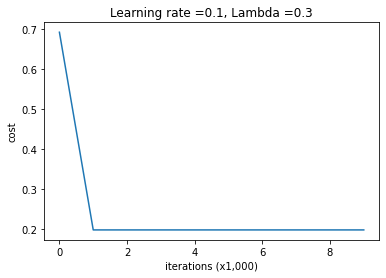

Accuracy = 0.924
Accuracy = 0.88


In [24]:
parameters = model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 0.3, h = 9)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

####  Layer = 10

Cost after iteration 0: 0.6929862779684034
Cost after iteration 1000: 0.19744082565861792
Cost after iteration 2000: 0.19744082565861792
Cost after iteration 3000: 0.19744082565861792
Cost after iteration 4000: 0.19744082565861792
Cost after iteration 5000: 0.19744082565861792
Cost after iteration 6000: 0.19744082565861792
Cost after iteration 7000: 0.19744082565861792
Cost after iteration 8000: 0.19744082565861792
Cost after iteration 9000: 0.19744082565861792


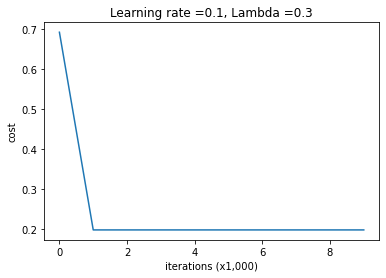

Accuracy = 0.924
Accuracy = 0.88


In [25]:
parameters = model(X_train, Y_train, learning_rate = 0.1, num_iterations = 10000, print_cost = True, lambd = 0.3, h = 10)

# accuracy over training set 
pre_train = predict(X_train,Y_train,parameters)

# accuracy over training set 
pre_test = predict(X_test,Y_test,parameters)

Since the cost and the accuracy of the models with 2 to 10 hidden layers are relatively comparable, I believe the minimum number of hidden layers required are 2. 